# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [23]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 601


['adamstown',
 'iqaluit',
 'loei',
 'margaret river',
 'porto novo',
 'rovaniemi',
 'remire-montjoly',
 'grytviken',
 'colonia',
 'port-aux-francais',
 'thompson',
 'puerto natales',
 'siwa oasis',
 'wailua homesteads',
 'bilibino',
 'albany',
 'yamada',
 'pacific grove',
 'chester springs',
 'yuzhno-kurilsk',
 'vadso',
 'port mathurin',
 'waitangi',
 'vorozhba',
 'tyazhinskiy',
 'tocopilla',
 'ad dabbah',
 'petropavlovsk-kamchatsky',
 'constantia',
 'al ghayzah',
 'georgetown',
 'puerto ayora',
 'tura',
 'altai',
 'avarua',
 'bethel',
 'fauske',
 'namibe',
 'praia da vitoria',
 'college',
 'santa marta',
 'yellowknife',
 'tutayev',
 'kozloduy',
 'wamba',
 'gardnerville ranchos',
 'tokar',
 'tazovsky',
 'la passe',
 'tiksi',
 'codrington',
 'chonchi',
 'sitka',
 'mugia',
 'uturoa',
 'margate',
 'blackmans bay',
 'hirara',
 'enewetak',
 'west island',
 'port lincoln',
 'zhezqazghan',
 'longyearbyen',
 'ust-nera',
 'udachny',
 'ilulissat',
 'fuvahmulah',
 'niafunke',
 'nuuk',
 'booue',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval             ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval             
-----------------------------
Processing Record 1 of Set 1 | margaret river
Processing Record 2 of Set 1 | kendari
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | fale old settlement
Processing Record 6 of Set 1 | quellon
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | nuuk
Processing Record 9 of Set 1 | arvayheer
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | okha
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | bethanie
Processing Record 14 of Set 1 | oliver
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | ust'-kut
Processing Record 18 of Set 1 | ilulissat
Processing Record 19 of Set 1 | zboriv
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | constantia
Processing Record 23 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,15.41,59,100,6.51,AU,1714436585
1,kendari,-3.9450,122.4989,23.86,97,100,1.09,ID,1714436585
2,port-aux-francais,-49.3500,70.2167,3.98,85,68,20.80,TF,1714436585
3,afaahiti,-17.7500,-149.2833,28.93,69,86,8.63,PF,1714436586
4,fale old settlement,-9.3852,-171.2468,29.67,73,64,4.79,TK,1714436586


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,15.41,59,100,6.51,AU,1714436585
1,kendari,-3.9450,122.4989,23.86,97,100,1.09,ID,1714436585
2,port-aux-francais,-49.3500,70.2167,3.98,85,68,20.80,TF,1714436585
3,afaahiti,-17.7500,-149.2833,28.93,69,86,8.63,PF,1714436586
4,fale old settlement,-9.3852,-171.2468,29.67,73,64,4.79,TK,1714436586


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

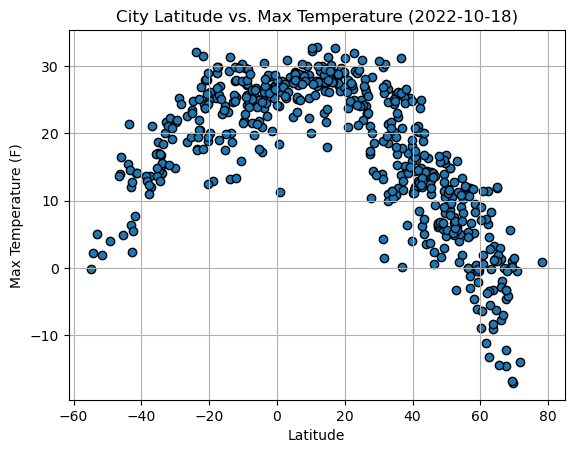

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

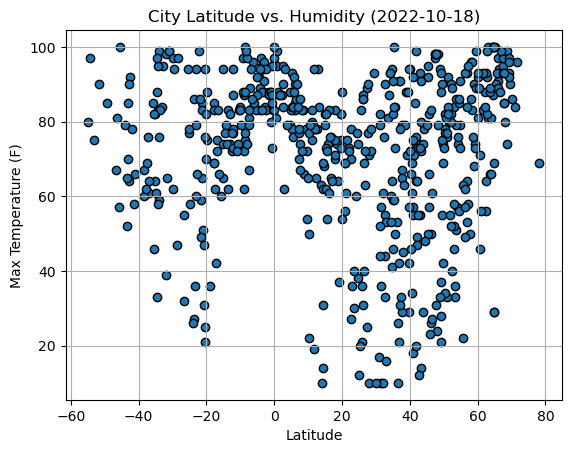

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

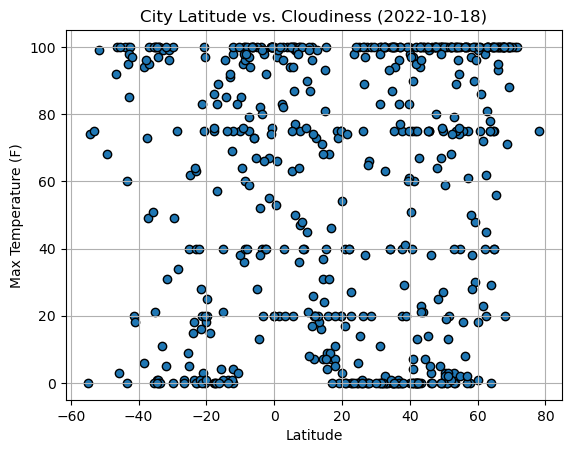

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

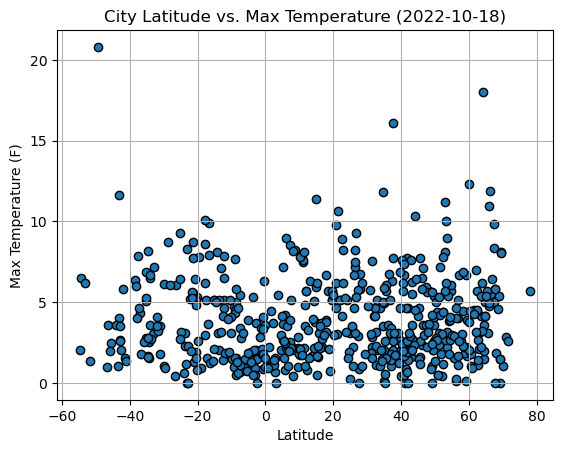

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, xlabel='', ylabel='', title=''):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.text(0.5, 0.9, line_eq, fontsize=12, ha='center', transform=plt.gca().transAxes, color='red')

    regress_values = x * slope + intercept
    
    # Plot scatter plot
    plt.scatter(x, y)

    # Plot regression line
    plt.plot(x, slope*x + intercept, color='red')

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # print the r value
    print(f'The r-value is: {r_value**2}')
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,anadyr,64.7500,177.4833,1.28,69,75,5.00,RU,1714436586
7,nuuk,64.1835,-51.7216,1.34,100,100,18.01,GL,1714436475
8,arvayheer,46.2639,102.7750,0.53,50,0,2.32,MN,1714436586
10,okha,53.5739,142.9478,4.03,51,89,2.24,RU,1714436486
11,albany,42.6001,-73.9662,14.94,74,67,1.76,US,1714436310


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,15.41,59,100,6.51,AU,1714436585
1,kendari,-3.9450,122.4989,23.86,97,100,1.09,ID,1714436585
2,port-aux-francais,-49.3500,70.2167,3.98,85,68,20.80,TF,1714436585
3,afaahiti,-17.7500,-149.2833,28.93,69,86,8.63,PF,1714436586
4,fale old settlement,-9.3852,-171.2468,29.67,73,64,4.79,TK,1714436586


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7410755895618489


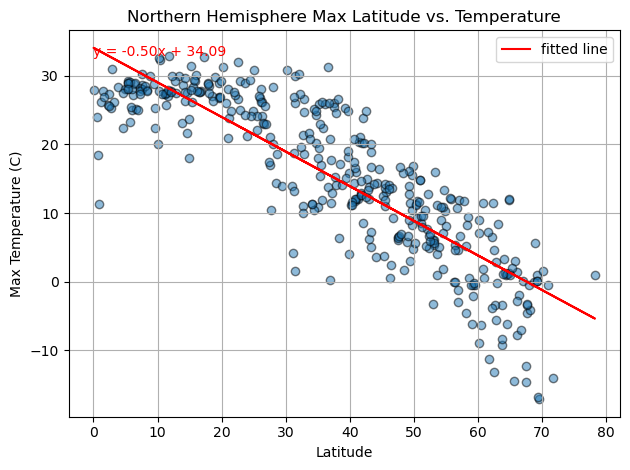

In [15]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], alpha=0.5, edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Plot the regression line
plt.plot(northern_hemi_df['Lat'], intercept + slope * northern_hemi_df['Lat'], 'r', label='fitted line')

# Add the equation of the line to the plot
plt.text(0, northern_hemi_df['Max Temp'].max(), f'y = {slope:.2f}x + {intercept:.2f}', color='red')

plt.grid(True)
plt.title("Northern Hemisphere Max Latitude vs. Temperature")
plt.tight_layout()
plt.legend()

# Print the r-value
print(f'The r-value is: {r_value**2}')

# Show plot
plt.show()

The r-value is: 0.573580205016476


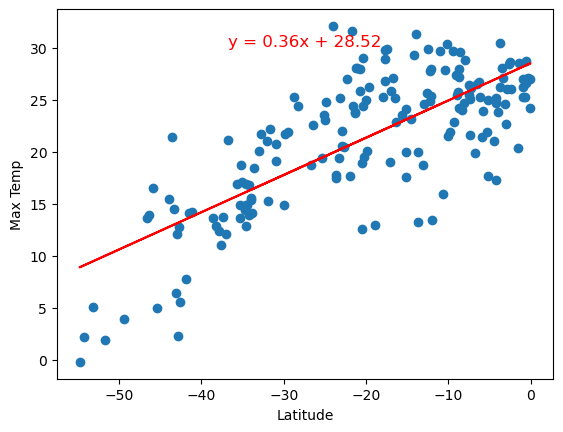

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** In the Southern Hemisphere, the linear regression analysis reveals a notable negative correlation between maximum temperature and latitude. This indicates that as one moves further south from the equator, there is a consistent trend of decreasing maximum temperatures. Thus, latitude emerges as a significant predictor of maximum temperature in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008069891764139707


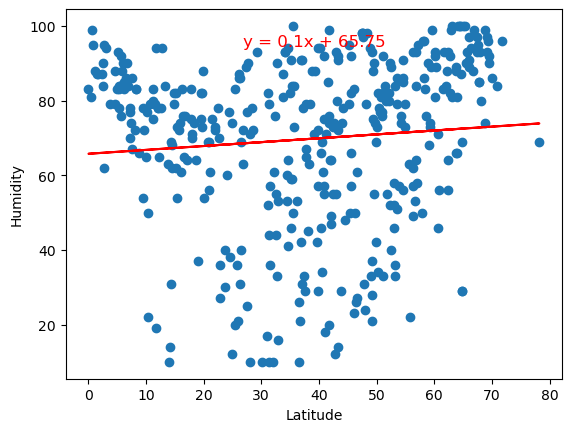

In [17]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity')

The r-value is: 0.059543691801441784


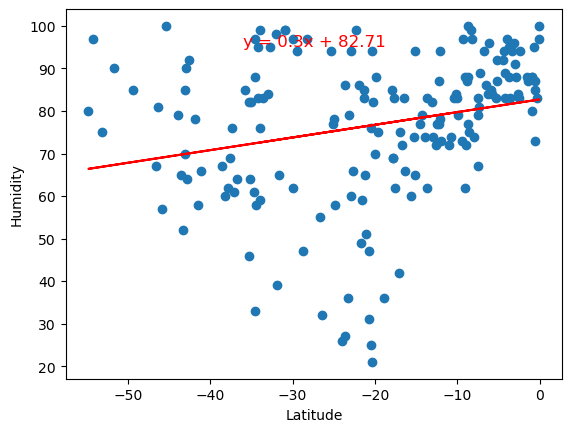

In [18]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity')

**Discussion about the linear relationship:** The linear regression plots for humidity versus latitude in both the Northern Hemisphere and Southern Hemisphere exhibit extremely weak positive correlations. This suggests that there is minimal to no discernible relationship between latitude and humidity levels in either hemisphere.








### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0217538943970608


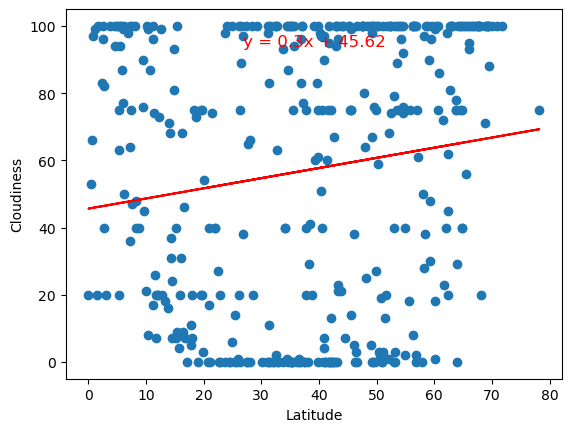

In [19]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

The r-value is: 0.012657646492503291


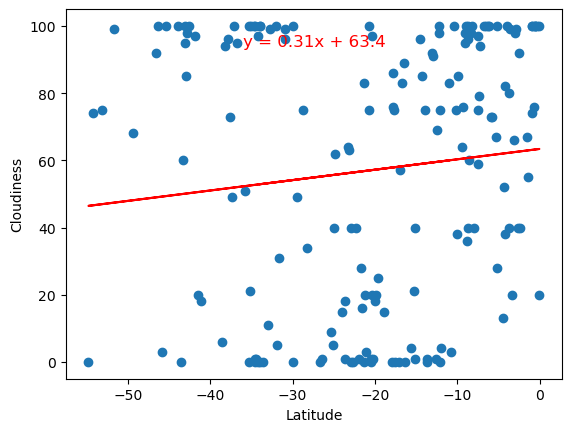

In [20]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** In both hemispheres, the linear regression analysis of cloudiness against latitude reveals a mild positive correlation. This suggests that as one moves further from the equator, either southward in 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008394913355174496


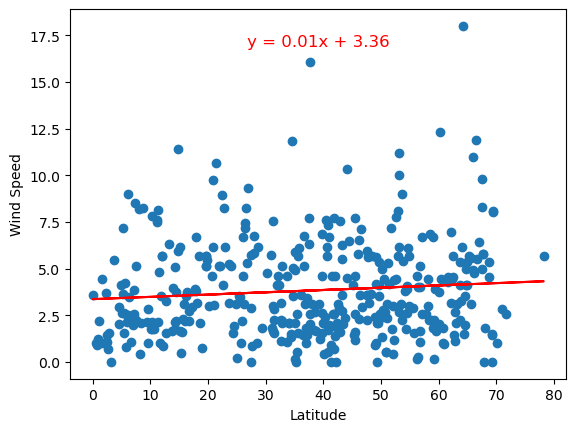

In [21]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

The r-value is: 0.060192967449627086


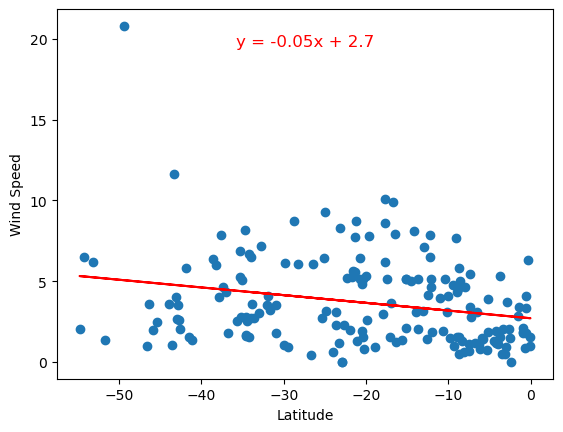

In [22]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** 
In the Southern Hemisphere, the linear regression analysis of wind speed against latitude reveals a mild positive correlation. This implies that as one moves southward from the equator, there is a tendency for wind speeds to marginally increase.

Conversely, in the Northern Hemisphere, the linear regression analysis of wind speed versus latitude suggests a mild negative correlation. This indicates that as latitude increases, moving northward from the equator, there is a slight tendency for wind speeds to decrease.